<a href="https://colab.research.google.com/github/Aratrika93/Kapoor/blob/main/Aratrika_Basu_ProblemSet_4(Updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
#Importing important libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

np.set_printoptions(suppress=True)
np.set_printoptions(threshold=10)

import matplotlib.pyplot as plt
%matplotlib inline


In [170]:
#Uploading files to Google Colab

In [3]:
from google.colab import files 
uploaded = files.upload()
uploadedZ = files.upload()
import io 
images = np.load(io.BytesIO(uploaded['ps4_trainvalid_images.npy'])) 
images_labels = pd.read_csv(io.BytesIO(uploadedZ['ps4_trainvalid_labels.csv'])) 

Saving ps4_trainvalid_images.npy to ps4_trainvalid_images.npy


Saving ps4_trainvalid_labels.csv to ps4_trainvalid_labels.csv


In [169]:
#Feature data & label data

In [4]:
images.shape, images_labels.shape

((13260, 64, 64, 1), (13260, 2))

In [5]:
images_labels1 = images_labels.drop('Id', axis = 1)
images_labels1

,Label
0,0
1,0
2,0
3,0
4,0
...,...
13255,1
13256,1
13257,0
13258,2


In [168]:
#To check label balance

In [9]:
images_labels1['Label'].value_counts()

0    10506
1     2372
2      382
Name: Label, dtype: int64

In [10]:
#Create random indices
np.random.seed(42)
N=len(images)

shuffled_indices = np.random.permutation(N)
train_indices = shuffled_indices[:int(N*0.6)]
valid_indices = shuffled_indices[int(N*0.6):int(N*0.8)]
test_indices = shuffled_indices[int(N*0.8):]

train_x = images[train_indices]
valid_x = images[valid_indices]
test_x = images[test_indices]

train_y=images_labels1.iloc[train_indices]
valid_y=images_labels1.iloc[valid_indices]
test_y=images_labels1.iloc[test_indices]

train_x.shape,valid_x.shape,test_x.shape,train_y.shape,valid_y.shape,test_y.shape

((7956, 64, 64, 1),
 (2652, 64, 64, 1),
 (2652, 64, 64, 1),
 (7956, 1),
 (2652, 1),
 (2652, 1))

In [167]:
#Applying oversampling technique SMOTE to train & validation dataset

In [19]:
print("Before OverSampling, counts of label '0': {}".format(sum(train_y['Label'] == 0))) 
print("Before OverSampling, counts of label '1': {} \n".format(sum(train_y['Label'] == 1))) 
print("Before OverSampling, counts of label '2': {} \n".format(sum(train_y['Label'] == 2))) 

Before OverSampling, counts of label '0': 6297
Before OverSampling, counts of label '1': 1437 

Before OverSampling, counts of label '2': 222 



In [42]:
print("Before OverSampling, counts of label '0': {}".format(sum(valid_y['Label'] == 0))) 
print("Before OverSampling, counts of label '1': {} \n".format(sum(valid_y['Label'] == 1))) 
print("Before OverSampling, counts of label '2': {} \n".format(sum(valid_y['Label'] == 2))) 

Before OverSampling, counts of label '0': 2101
Before OverSampling, counts of label '1': 473 

Before OverSampling, counts of label '2': 78 



In [27]:
nsamples, nx, ny, z = train_x.shape
d2_train_x = train_x.reshape((nsamples,nx*ny))
d2_train_x.shape

(7956, 4096)

In [44]:
nsamples, nx, ny, z = valid_x.shape
d2_valid_x = valid_x.reshape((nsamples,nx*ny))
d2_valid_x.shape

(2652, 4096)

In [28]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 3) 
X_train_res, y_train_res = sm.fit_resample(d2_train_x, train_y) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2))) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (18891, 4096)
After OverSampling, the shape of train_y: (18891,) 

After OverSampling, counts of label '0': 6297
After OverSampling, counts of label '1': 6297
After OverSampling, counts of label '2': 6297


In [48]:
import math
nsamples, nx = X_train_res.shape
fin_train_x = X_train_res.reshape((nsamples,int(math.sqrt(nx)),int(math.sqrt(nx)), 1))
fin_train_x.shape, y_train_res.shape

((18891, 64, 64, 1), (18891,))

In [46]:
sm = SMOTE(random_state = 3) 
X_valid_res, y_valid_res = sm.fit_resample(d2_valid_x, valid_y) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_valid_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_valid_res.shape)) 
  
print("After OverSampling, counts of label '0': {}".format(sum(y_valid_res == 0))) 
print("After OverSampling, counts of label '1': {}".format(sum(y_valid_res == 1))) 
print("After OverSampling, counts of label '2': {}".format(sum(y_valid_res == 2))) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (6303, 4096)
After OverSampling, the shape of train_y: (6303,) 

After OverSampling, counts of label '0': 2101
After OverSampling, counts of label '1': 2101
After OverSampling, counts of label '2': 2101


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [49]:
import math
nsamples, nx = X_valid_res.shape
fin_valid_x = X_valid_res.reshape((nsamples,int(math.sqrt(nx)),int(math.sqrt(nx)), 1))
fin_valid_x.shape, y_valid_res.shape

((6303, 64, 64, 1), (6303,))

In [7]:
#Simple Forward-Fed Neural Network

In [50]:
onelayer = tf.keras.Sequential([
                                        tf.keras.layers.Flatten(input_shape=(64, 64, 1)),
                                        tf.keras.layers.Dense(128, activation = 'relu'),
                                        tf.keras.layers.Dense(10, activation = 'softmax')])


onelayer.compile(optimizer = 'adam', 
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                 metrics = ['accuracy'])

onelayer.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               524416    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 525,706
Trainable params: 525,706
Non-trainable params: 0
_________________________________________________________________


In [54]:
#Early Stopping used throughout all the models, for controlling overfitting & getting optimum number of epochs
callback1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [55]:
#Train
history = onelayer.fit(fin_train_x, y_train_res, epochs=30, validation_data=(fin_valid_x, y_valid_res), callbacks=[callback1])

Epoch 1/30
591/591 [==============================] - 3s 6ms/step - loss: 1.0989 - accuracy: 0.3258 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 2/30
591/591 [==============================] - 3s 5ms/step - loss: 1.0988 - accuracy: 0.3323 - val_loss: 1.0986 - val_accuracy: 0.3337
Epoch 3/30
591/591 [==============================] - 3s 5ms/step - loss: 1.0989 - accuracy: 0.3286 - val_loss: 1.0986 - val_accuracy: 0.3337
Epoch 4/30
591/591 [==============================] - 3s 5ms/step - loss: 1.0988 - accuracy: 0.3337 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/30
591/591 [==============================] - 3s 6ms/step - loss: 1.0988 - accuracy: 0.3296 - val_loss: 1.0986 - val_accuracy: 0.3335
Epoch 6/30
591/591 [==============================] - 3s 6ms/step - loss: 1.0988 - accuracy: 0.3288 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/30
591/591 [==============================] - 3s 6ms/step - loss: 1.0988 - accuracy: 0.3279 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 

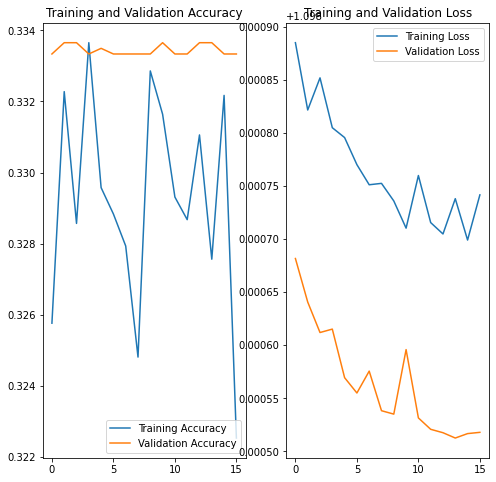

In [56]:
#Plotting accuracy & loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(16)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [165]:
#Random test on a validation datapoint

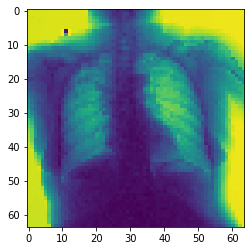

In [58]:
idx = 56
plt.imshow(fin_valid_x[idx].squeeze())

In [59]:
pred = onelayer.predict(fin_valid_x[idx].reshape(-1, 64, 64, 1))
pred

array([[0.33483207, 0.33356777, 0.33159587, 0.00000062, 0.00000056,
        0.00000056, 0.00000055, 0.00000052, 0.00000096, 0.00000056]],
      dtype=float32)

In [61]:
"""
0: Healthy  1: Pre-existing Conditions  3:Effusion/Mass
"""
np.argmax(pred), y_valid_res[idx]

(0, 1)

In [166]:
#Same Simple Fed-Forward neural network model with Dropout

In [62]:

onelayer = tf.keras.Sequential([
                                        tf.keras.layers.Flatten(input_shape=(64, 64, 1)),
                                        tf.keras.layers.Dropout(0.2),
                                        tf.keras.layers.Dense(128, activation = 'relu'),
                                        tf.keras.layers.Dense(10, activation = 'softmax')])


onelayer.compile(optimizer = 'adam', 
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                 metrics = ['accuracy'])

onelayer.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 525,706
Trainable params: 525,706
Non-trainable params: 0
_________________________________________________________________


In [66]:
#Train
history = onelayer.fit(fin_train_x, y_train_res, epochs=16, validation_data=(fin_valid_x, y_valid_res))

Epoch 1/16
591/591 [==============================] - 4s 7ms/step - loss: 1.3079 - accuracy: 0.3333 - val_loss: 1.1560 - val_accuracy: 0.3333
Epoch 2/16
591/591 [==============================] - 4s 7ms/step - loss: 1.1232 - accuracy: 0.3333 - val_loss: 1.1066 - val_accuracy: 0.3333
Epoch 3/16
591/591 [==============================] - 4s 8ms/step - loss: 1.1031 - accuracy: 0.3333 - val_loss: 1.1013 - val_accuracy: 0.3333
Epoch 4/16
591/591 [==============================] - 4s 7ms/step - loss: 1.1008 - accuracy: 0.3323 - val_loss: 1.1004 - val_accuracy: 0.3333
Epoch 5/16
591/591 [==============================] - 4s 7ms/step - loss: 1.1002 - accuracy: 0.3315 - val_loss: 1.1000 - val_accuracy: 0.3333
Epoch 6/16
591/591 [==============================] - 4s 7ms/step - loss: 1.1104 - accuracy: 0.3285 - val_loss: 1.0996 - val_accuracy: 0.3333
Epoch 7/16
591/591 [==============================] - 4s 7ms/step - loss: 1.0996 - accuracy: 0.3301 - val_loss: 1.0994 - val_accuracy: 0.3333
Epoch 

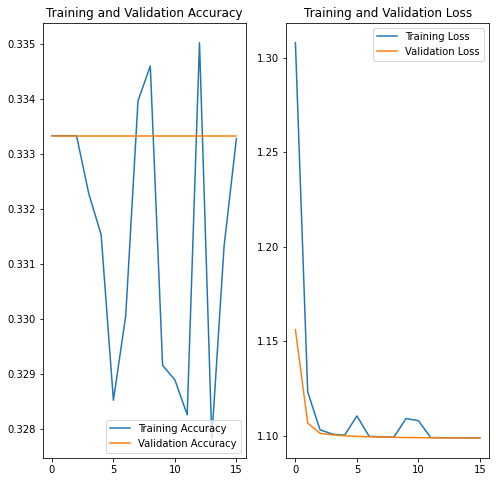

In [67]:
#Plotting accuracy & loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(16)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [164]:
#Random test on a validation datapoint

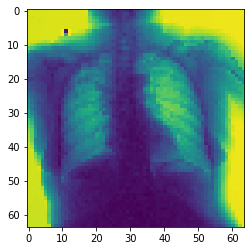

In [68]:
idx = 56
plt.imshow(fin_valid_x[idx].squeeze())

In [69]:
pred = onelayer.predict(fin_valid_x[idx].reshape(-1, 64, 64, 1))
pred

array([[0.33145094, 0.3325985 , 0.33583125, 0.00001584, 0.00001101,
        0.00001517, 0.00000823, 0.00001147, 0.00004522, 0.00001246]],
      dtype=float32)

In [70]:
"""
0: Healthy  1: Pre-existing Conditions  3:Effusion/Mass
"""
np.argmax(pred), y_valid_res[idx]

(2, 1)

In [131]:
#LeNet5 model without Drop out layer

In [71]:
lenet5 = tf.keras.Sequential([
                              #1st Convolution
                              tf.keras.layers.Conv2D(
                                  filters = 20, kernel_size= (5,5), activation= 'relu', input_shape = (64,64,1)),
                              tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=None, padding='valid'),
                              #2nd Convolution
                              tf.keras.layers.Conv2D(filters=50, kernel_size=(5,5), activation='relu'),
                              tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=None, padding='valid'),
                              #Dense
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(500, activation= 'relu'),
                              tf.keras.layers.Dense(10, activation= 'softmax')
                        
])

lenet5.compile(optimizer= 'adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

lenet5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 50)        25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8450)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               4225500   
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [72]:
#Train
history = lenet5.fit(fin_train_x, y_train_res, epochs=20, validation_data=(fin_valid_x, y_valid_res), callbacks=[callback1])

Epoch 1/20
591/591 [==============================] - 126s 213ms/step - loss: 4.9903 - accuracy: 0.5691 - val_loss: 0.7266 - val_accuracy: 0.6460
Epoch 2/20
591/591 [==============================] - 125s 212ms/step - loss: 0.5457 - accuracy: 0.7604 - val_loss: 0.9381 - val_accuracy: 0.6503
Epoch 3/20
591/591 [==============================] - 124s 209ms/step - loss: 0.3584 - accuracy: 0.8549 - val_loss: 0.9928 - val_accuracy: 0.6632


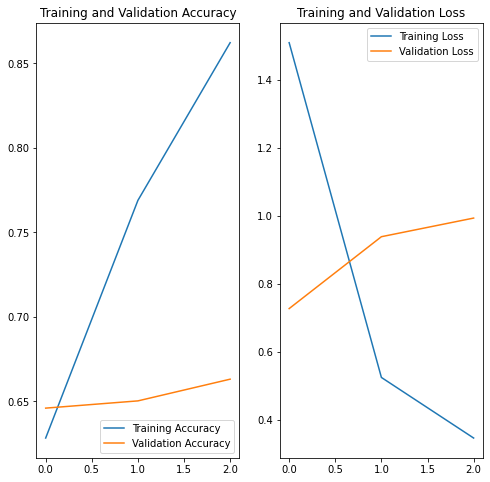

In [73]:
#Plotting accuracy & loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(3)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [163]:
#LeNet5 model with Drop out layer & an additional Convolution layer

In [74]:
lenet5D = tf.keras.Sequential([
                              #1st Convolution
                              tf.keras.layers.Conv2D(
                                  filters = 20, kernel_size= (5,5), activation= 'relu', input_shape = (64,64,1)),
                              tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=None, padding='valid'),
                              #2nd Convolution
                              tf.keras.layers.Conv2D(filters=50, kernel_size=(5,5), activation='relu'),
                              tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=None, padding='valid'),
                              #3rd Convolution
                              tf.keras.layers.Conv2D(filters=100, kernel_size=(5,5), activation='relu'),
                              tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=None, padding='valid'),
                              #Dropout
                              tf.keras.layers.Dropout(0.2),
                              #Dense
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(500, activation= 'relu'),
                              tf.keras.layers.Dense(10, activation= 'softmax')
                        
])

lenet5D.compile(optimizer= 'adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

lenet5D.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 60, 60, 20)        520       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 50)        25050     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 50)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 100)         125100    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 100)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 100)        

In [75]:
#Train
history = lenet5D.fit(fin_train_x, y_train_res, epochs=7, validation_data=(fin_valid_x, y_valid_res),callbacks=[callback1])

Epoch 1/7
591/591 [==============================] - 144s 243ms/step - loss: 3.5232 - accuracy: 0.5146 - val_loss: 0.7036 - val_accuracy: 0.6297
Epoch 2/7
591/591 [==============================] - 148s 251ms/step - loss: 0.6839 - accuracy: 0.6535 - val_loss: 0.6675 - val_accuracy: 0.6695
Epoch 3/7
591/591 [==============================] - 140s 238ms/step - loss: 0.5948 - accuracy: 0.7155 - val_loss: 0.6125 - val_accuracy: 0.6917
Epoch 4/7
591/591 [==============================] - 141s 238ms/step - loss: 0.5435 - accuracy: 0.7381 - val_loss: 0.6170 - val_accuracy: 0.6919
Epoch 5/7
591/591 [==============================] - 155s 263ms/step - loss: 0.4943 - accuracy: 0.7722 - val_loss: 0.6864 - val_accuracy: 0.6875


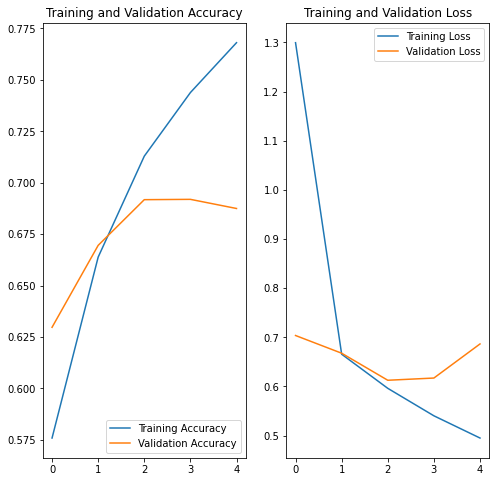

In [76]:
#Plotting accuracy & loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Random test on a validation datapoint

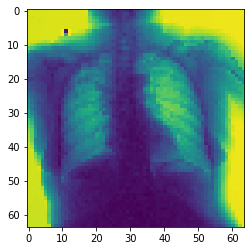

In [77]:
idx = 56
plt.imshow(fin_valid_x[idx].squeeze())

In [78]:
pred = lenet5D.predict(fin_valid_x[idx].reshape(-1, 64, 64, 1))
pred

array([[0.88580024, 0.11370473, 0.00049502, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]],
      dtype=float32)

In [79]:
"""
0: Healthy  1: Pre-existing Conditions  3:Effusion/Mass
"""
np.argmax(pred), y_valid_res[idx]

(0, 1)

In [115]:
#VGG model without data augmentation layer

In [100]:
vgg = tf.keras.Sequential([
                           tf.keras.layers.Conv2D(64, (3,3),strides = 1, padding = 'same', activation = 'relu', input_shape=(64, 64, 1)),
                           tf.keras.layers.Conv2D(64, (3,3),strides = 1, padding = 'same', activation = 'relu'),
                           tf.keras.layers.MaxPool2D(pool_size =(2,2), strides= None, padding= 'valid'),

                           tf.keras.layers.Conv2D(128, (3,3),strides = 1, padding = 'same', activation = 'relu'),
                           tf.keras.layers.Conv2D(128, (3,3),strides = 1, padding = 'same', activation = 'relu'),
                           tf.keras.layers.MaxPool2D(pool_size =(2,2), strides= None, padding= 'valid'),

                           tf.keras.layers.Conv2D(256, (3,3),strides = 1, padding = 'same', activation = 'relu'),
                           tf.keras.layers.Conv2D(256, (3,3),strides = 1, padding = 'same', activation = 'relu'),
                           tf.keras.layers.Dropout(0.4),
                           tf.keras.layers.MaxPool2D(pool_size =(2,2), strides= None, padding= 'valid'),

                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512, activation= 'relu'),
                           tf.keras.layers.Dense(10, activation= 'softmax')
])

vgg.compile(optimizer = 'adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),metrics=['accuracy'])

vgg.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 64)        640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 256)      

In [101]:
#Train
history = vgg.fit(fin_train_x, y_train_res, epochs=20, validation_data=(fin_valid_x, y_valid_res), callbacks=[callback1])

Epoch 1/20
591/591 [==============================] - 1644s 3s/step - loss: 3.8957 - accuracy: 0.5522 - val_loss: 0.6294 - val_accuracy: 0.6611
Epoch 2/20
591/591 [==============================] - 1642s 3s/step - loss: 0.6169 - accuracy: 0.6815 - val_loss: 0.5978 - val_accuracy: 0.6746
Epoch 3/20
591/591 [==============================] - 1691s 3s/step - loss: 0.5612 - accuracy: 0.7238 - val_loss: 0.5961 - val_accuracy: 0.7147
Epoch 4/20
591/591 [==============================] - 1636s 3s/step - loss: 0.4878 - accuracy: 0.7781 - val_loss: 0.6297 - val_accuracy: 0.6979
Epoch 5/20
591/591 [==============================] - 1646s 3s/step - loss: 0.4236 - accuracy: 0.8119 - val_loss: 0.5966 - val_accuracy: 0.7138


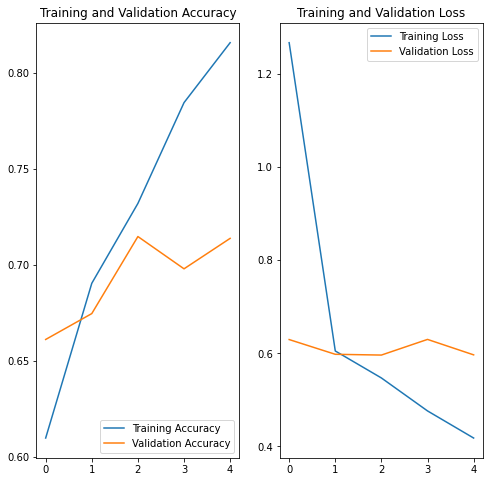

In [102]:
#Plotting accuracy & loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Random test on a validation datapoint

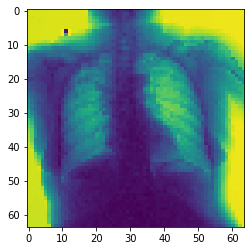

In [103]:
idx = 56
plt.imshow(fin_valid_x[idx].squeeze())

In [104]:
pred = vgg.predict(fin_valid_x[idx].reshape(-1, 64, 64, 1))
pred

array([[0.15333258, 0.8171858 , 0.02948156, 0.        , 0.00000001,
        0.00000001, 0.00000001, 0.00000001, 0.00000001, 0.00000002]],
      dtype=float32)

In [105]:
"""
0: Healthy  1: Pre-existing Conditions  3:Effusion/Mass
"""
np.argmax(pred), y_valid_res[idx]

(1, 1)

In [116]:
#VGG model with data augmentation layer

In [120]:
data_augmentation = tf.keras.Sequential([
                                         tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape =(64 , 64, 1)),
                                         tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
                                         tf.keras.layers.experimental.preprocessing.RandomZoom(0.1)
                                         
])

In [123]:
vggA = tf.keras.Sequential([
                            data_augmentation,
                           tf.keras.layers.Conv2D(64, (3,3),strides = 1, padding = 'same', activation = 'relu'),
                           tf.keras.layers.Conv2D(64, (3,3),strides = 1, padding = 'same', activation = 'relu'),
                           tf.keras.layers.MaxPool2D(pool_size =(2,2), strides= None, padding= 'valid'),

                           tf.keras.layers.Conv2D(128, (3,3),strides = 1, padding = 'same', activation = 'relu'),
                           tf.keras.layers.Conv2D(128, (3,3),strides = 1, padding = 'same', activation = 'relu'),
                           tf.keras.layers.MaxPool2D(pool_size =(2,2), strides= None, padding= 'valid'),

                           tf.keras.layers.Conv2D(256, (3,3),strides = 1, padding = 'same', activation = 'relu'),
                           tf.keras.layers.Conv2D(256, (3,3),strides = 1, padding = 'same', activation = 'relu'),
                           tf.keras.layers.Dropout(0.4),
                           tf.keras.layers.MaxPool2D(pool_size =(2,2), strides= None, padding= 'valid'),

                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512, activation= 'relu'),
                           tf.keras.layers.Dense(10, activation= 'softmax')
])

vggA.compile(optimizer = 'adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),metrics=['accuracy'])

vggA.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_7 (Sequential)    (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 64, 64)        640       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 128)      

In [124]:
#Train
history = vggA.fit(fin_train_x, y_train_res, epochs=20, validation_data=(fin_valid_x, y_valid_res), callbacks=[callback1])

Epoch 1/20
591/591 [==============================] - 1648s 3s/step - loss: 3.8660 - accuracy: 0.4967 - val_loss: 0.8048 - val_accuracy: 0.6000
Epoch 2/20
591/591 [==============================] - 1673s 3s/step - loss: 0.7677 - accuracy: 0.6041 - val_loss: 0.7407 - val_accuracy: 0.5932
Epoch 3/20
591/591 [==============================] - 1703s 3s/step - loss: 0.7228 - accuracy: 0.6167 - val_loss: 1.1047 - val_accuracy: 0.5126
Epoch 4/20
591/591 [==============================] - 1714s 3s/step - loss: 0.6814 - accuracy: 0.6440 - val_loss: 0.6792 - val_accuracy: 0.6608
Epoch 5/20
591/591 [==============================] - 1646s 3s/step - loss: 0.6636 - accuracy: 0.6498 - val_loss: 0.7686 - val_accuracy: 0.6172
Epoch 6/20
591/591 [==============================] - 1641s 3s/step - loss: 0.6358 - accuracy: 0.6683 - val_loss: 0.9363 - val_accuracy: 0.5777


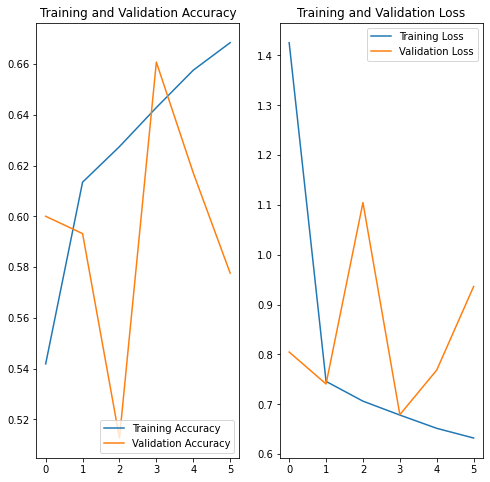

In [126]:
#Plotting accuracy & loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(6)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [161]:
#Testing & Evaluation

In [150]:
test_y['Label'].value_counts()

0    2108
1     462
2      82
Name: Label, dtype: int64

In [132]:
test_loss, test_acc = vgg.evaluate(test_x, test_y, verbose = 2)
test_loss, test_acc

83/83 - 55s - loss: 0.3572 - accuracy: 0.8556


(0.35718971490859985, 0.8555806875228882)

In [160]:
#Random test on a test datapoint

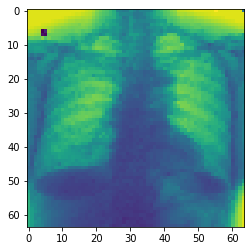

In [147]:
idx = 90
plt.imshow(test_x[idx].squeeze())

In [148]:
pred = vgg.predict(test_x[idx].reshape(-1, 64, 64, 1))
pred

array([[0.00430501, 0.9155918 , 0.08010321, 0.00000001, 0.        ,
        0.00000003, 0.00000001, 0.        , 0.00000001, 0.00000001]],
      dtype=float32)

In [149]:
"""
0: Healthy  1: Pre-existing Conditions  3:Effusion/Mass
"""
np.argmax(pred), test_y.iloc[idx]

(1, Label    1
 Name: 7870, dtype: int64)

In [159]:
#Calculating the Confusion Matrix

In [133]:
predicted_labels = vgg.predict(test_x.reshape(-1, 64, 64, 1))
predicted_labels

array([[0.9034499 , 0.0509339 , 0.0455375 , ..., 0.00001441, 0.00000857,
        0.00001108],
       [0.2078556 , 0.54426444, 0.24787833, ..., 0.00000018, 0.00000012,
        0.00000059],
       [0.94184506, 0.04496688, 0.01317852, ..., 0.0000011 , 0.00000104,
        0.00000083],
       ...,
       [0.98114634, 0.00244177, 0.01641181, ..., 0.00000002, 0.00000001,
        0.00000001],
       [0.8776089 , 0.09806649, 0.02431587, ..., 0.00000162, 0.00000203,
        0.00000101],
       [0.98839635, 0.01082885, 0.00077488, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [136]:
vd_preds = np.argmax(predicted_labels,axis=1)

In [137]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_y, vd_preds)
print(cnf_matrix)

[[1960  104   44]
 [  84  277  101]
 [  22   28   32]]


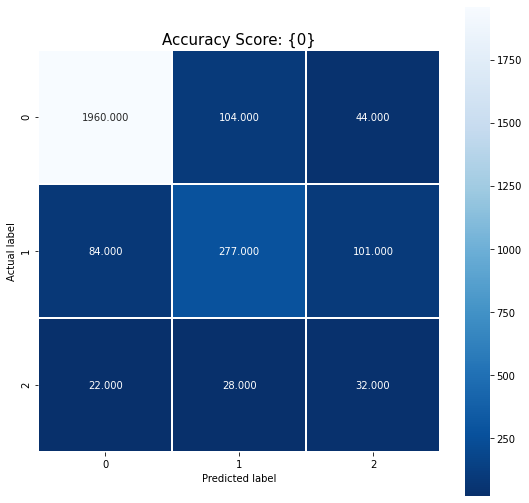

In [143]:
#Plotting Confusion matrix
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cnf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'
plt.title(all_sample_title, size = 15);

In [158]:
#Confusion matrix metrics
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
print('False Positive: ', FP)
FN = FN.astype(float)
print('False Negative: ', FN)
TP = TP.astype(float)
print('True Positive: ', TP)
TN = TN.astype(float)
print('True Negative: ', TN)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print('Sensitivity/Recall: ',TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print('Specificity: ',TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print('Precission: ',PPV)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print('Accuracy: ',ACC)

False Positive:  [106. 132. 145.]
False Negative:  [148. 185.  50.]
True Positive:  [1960.  277.   32.]
True Negative:  [ 438. 2058. 2425.]
Sensitivity/Recall:  [0.92979127 0.5995671  0.3902439 ]
Specificity:  [0.80514706 0.93972603 0.94357977]
Precission:  [0.94869313 0.67726161 0.18079096]
Accuracy:  [0.90422323 0.88046757 0.92647059]


In [156]:
#Interpretations:

#	The image classifier model VGG with early stopping & drop out,  is able to classify the CT-scanned lung images into three categories namely healthy patients (represented by 
#label ‘0’), patients with pre-existing conditions (represented by label ‘1’) & patients with serious condition (represented by label ‘2’),with an accuracy of 0.85.

#	We also created a confusion matrix for the final classifier in order to evaluate it. We achieved a specificity of 0.80 for label ‘0’, 0.93 for label ‘1’ & 0.94 for label ‘2’.
#This high specificity/true negative rate suggests that the model was able to correctly identify the proportion of those who do not have the condition (unaffected). That is, 
# the healthy people are not classified as someone who needs care, also the people who needs care are also not classified as someone who is healthy, with a high degree of accuracy.

#	The data provided was highly unbalanced, we applied the over sampling technique called SMOTE in order to balance the minority class data. This was a important step because 
#with the provided label segregation our model will be heavy/biased towards the label ‘0’ data, so in cases when we have a dataset comprising mostly of label ‘1’ or label ‘2’ 
#data the model will perform poorly

#	We also used the model to predict the classes of new images (as part of the Kaggle competition), we are getting an accuracy of 71% there. Therefore, we can say that the model 
#works very well & is successfully able to classify the scanned images into three categories.



In [157]:
#KAGGLE COMPETITION

In [85]:
from google.colab import files 
uploadedY = files.upload()
import io 
kaggle = np.load(io.BytesIO(uploadedY['ps4_kaggle_images.npy'])) 

Saving ps4_kaggle_images.npy to ps4_kaggle_images.npy


In [86]:
kaggle.shape

(300, 64, 64, 1)

In [87]:
len(kaggle)

300

In [128]:
list1 = []
list2 = []
Predicted = []
for i in range(0,len(kaggle)):
  pred = vggA.predict(kaggle[i].reshape(-1, 64, 64, 1))
  list1 = np.argmax(pred)
  Predicted.append(list1)
  list2.append(i)
print(list2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [129]:
df = pd.DataFrame()
df['Id'] = list2
df['Predicted'] = Predicted

column = df['Predicted']
max_value = column.max()
max_value

2

In [130]:
df

,Id,Predicted
0,0,1
1,1,1
2,2,0
3,3,1
4,4,0
...,...,...
295,295,2
296,296,1
297,297,1
298,298,1


In [131]:
df.to_csv('VGG_earlystop_aug_Dropout1.csv', index=False)